In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
h = fits.open('Structure_Radius')
i = fits.open('Structure_Distance')

In [3]:
h.info()
i.info()

Filename: Structure_Radius
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (6567,)   uint8   
  1  Joined        1 BinTableHDU    209   41551R x 97C   [K, 15A, D, D, J, E, J, J, J, E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, J, E, E, E, E, E, E, J, E, E, E, E, E, E, J, E, E, E, E, E, E, J, J, J, J, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, D]   
Filename: Structure_Distance
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (8064,)   uint8   
  1  Joined        1 BinTableHDU    246   197388R x 112C   [K, 15A, D, D, J, E, J, J, J, E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, E, J, E, E, E, E, E, E, E, E, E, J, J, J, J, J, E, E, E, E, E, E, J, E, E, E, E, E, E, J, E, E, E, E, E, E, J, J, J, K, D, D, K, 2A, D, K, D, D, D, D, D, D, D, D, D,

In [4]:
H = h[1].data
I = i[1].data

In [5]:
c = 300000
H_0 = 70

Sersic_R = np.array(H.field(16))
Radius = np.array(H.field(81))

In [6]:
from scipy.stats import gaussian_kde

xy = np.vstack([Radius,Sersic_R])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
Radius2, Sersic_R2, z = Radius[idx], Sersic_R[idx], z[idx]

Text(0, 0.5, 'Sersic Index')

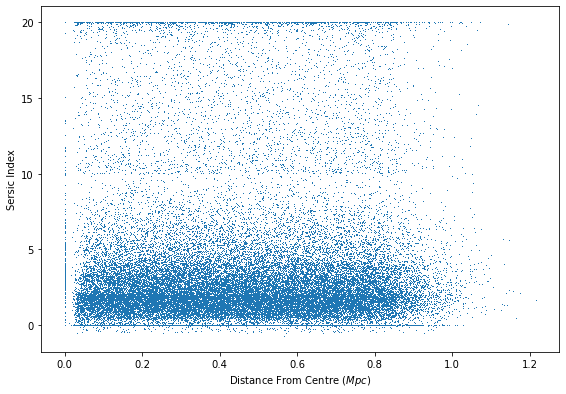

In [8]:
plt.figure(1).add_axes((0,0,1.2,1.2))

plt.scatter(Radius, Sersic_R, s=1, marker="s", linewidth=0)

plt.xlabel("Distance From Centre ($Mpc$)")
plt.ylabel("Sersic Index")